In [1]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df=yf.download('AAPl',start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133326,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102959,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240791,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544470,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600
...,...,...,...,...,...,...
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300


In [4]:
#Description Mean Reversion Trading Strategy

In [5]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Create a function to calculate the simple moving average
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [7]:
#Build and Show the data set 
df['SMA']=SMA(df,40)
df['Simple_Returns']=df.pct_change(1)['Close']
df['Log_returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Close']/df['SMA']
#Show the data
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_returns,Ratios
Date,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133326,115127600,NaN,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102959,84472400,NaN,-0.001119,-0.001120,NaN
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240791,88774400,NaN,0.005085,0.005072,NaN
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544470,127007600,NaN,0.011148,0.011087,NaN
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600,NaN,0.009159,0.009118,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900,140.257499,-0.007547,-0.007575,1.087642
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200,140.583249,-0.026680,-0.027042,1.056171
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300,141.000249,0.002896,0.002892,1.056097


In [8]:
#Get Some Statistics on the Ratio column
df['Ratios'].describe()

count    1508.000000
mean        1.020753
std         0.068345
min         0.762866
25%         0.977886
50%         1.028088
75%         1.067657
max         1.239182
Name: Ratios, dtype: float64

In [9]:
#Get and Show the percentile values
percentiles=[15,20,50,80,85]
#Remove any Na values in the Ratios column and store the result in a new variable clled ratios
ratios=df['Ratios'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.95250962, 0.96711542, 1.02808791, 1.07775099, 1.08820045])

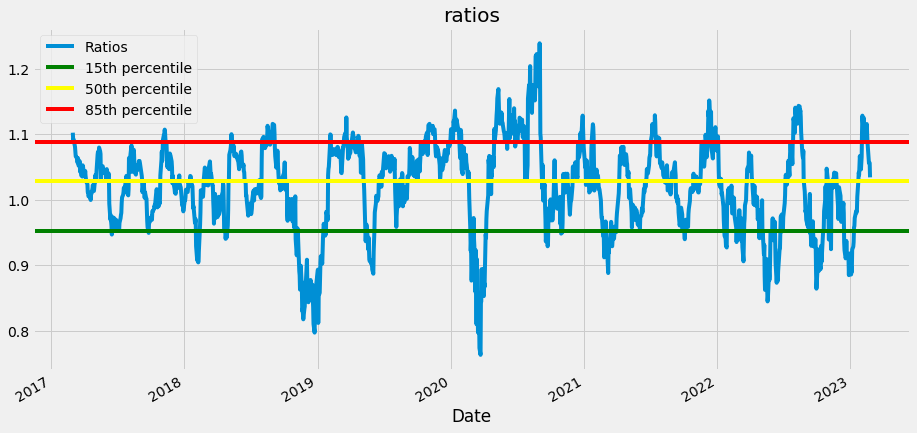

In [10]:
# Plot the Ratios
plt.figure(figsize=(14,7))
plt.title('ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0],c='green',label='15th percentile')
plt.axhline(percentile_values[2],c='yellow',label='50th percentile')
plt.axhline(percentile_values[-1],c='red',label='85th percentile')
plt.legend()

In [11]:
#Create buy and sell signals for the strategy
sell=percentile_values[-1]#The 85th percentile threshold where we want to sell
buy=percentile_values[0]#The 15th percentile threshold where we want to buy
#Put -1 where the ratio is greater than the percentile to sell and nan otherwise
df['Positions']=np.where(df.Ratios>sell,-1,np.nan)
#Put 1 where the ratio is less than the percentile to buy and put the current value otherwise
df['Positions']=np.where(df.Ratios<buy,1,df['Positions'])
#Use ffill to fill the missing values in the data frame.ffill stands for forward fill
df['Positions']=df['Positions'].ffill()

#Get the buy and sell signals
df['Buy']=np.where(df.Positions==1,df['Close'],np.nan)
df['Sell']=np.where(df.Positions==-1,df['Close'],np.nan)

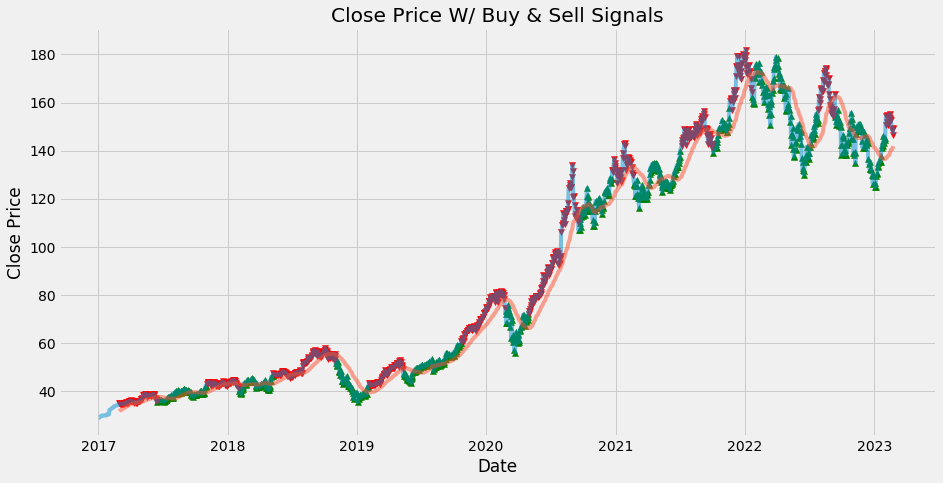

In [12]:
#Visualize the buy and sell signals along with the close price
plt.figure(figsize=(14,7))
plt.title('Close Price W/ Buy & Sell Signals')
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['SMA'],alpha=0.5,label='SMA')
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',label='Buy Signal',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [13]:
#Calculate the returns for the Mean Reversion Strategy
df['Strategy_Returns']=df.Positions.shift(1)*df.Log_returns
df['Strategy_Returns']

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2023-02-17    0.007575
2023-02-21    0.027042
2023-02-22   -0.002892
2023-02-23   -0.003285
2023-02-24    0.018169
Name: Strategy_Returns, Length: 1547, dtype: float64

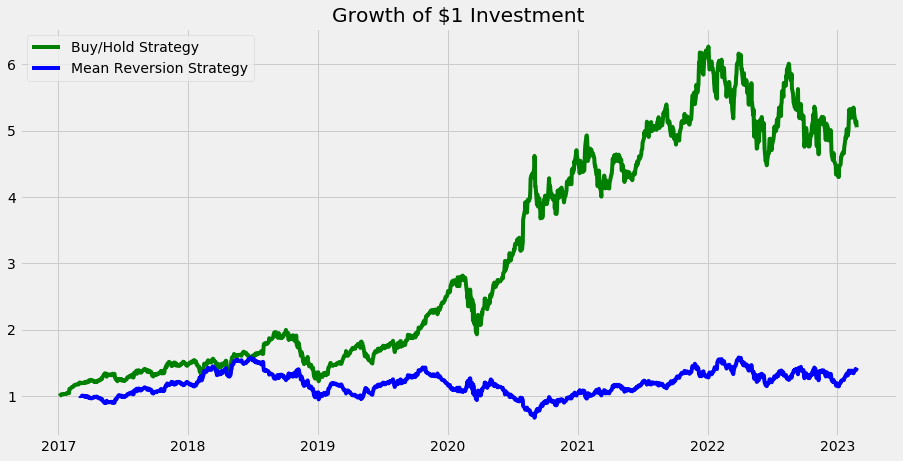

In [14]:
#Plot the cumalative log returns & the cumalative Mean Reversion Strategy
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_returns'].dropna()).cumprod(),c='green',label='Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(),c='blue',label='Mean Reversion Strategy')
plt.legend()

In [15]:
#print the Returns for both strategy
print('Buy & Hold Strategy Returns:',np.exp(df['Log_returns'].dropna()).cumprod()[-1]-1)
print('Mean Reversion Strategy Returns:',np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)

Buy & Hold Strategy Returns: 4.052432364580884
Mean Reversion Strategy Returns: 0.42450138462078835
